# TOÁN ỨNG DỤNG THỐNG KÊ
## Lớp: 22_2
## MSSV: 22120157
## Họ tên: Nguyễn Nam Khánh
## Đồ án thực hành cuối kỳ HK2 2023-2024



### Câu 1: Data Fitting

#### Cài đặt các hàm phục vụ cho việc xây dựng mô hình

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)  # Không hiển thị số thực theo dạng 1e-xx

df = pd.read_csv('./national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset/NHANES_age_prediction.csv')
#Đây là đường dẫn sau khi đặt tất cả các file vào cùng 1 thư mục và giải nén file zip chứa dữ liệu
print(df)

# Hàm chuyển vị ma trận
def transpose(A):
    if len(A.shape) == 1:
        A = A.reshape(-1, 1)
    rows, cols = A.shape
    AT = np.zeros((cols, rows))
    for i in range(rows):
        for j in range(cols):
            AT[j][i] = A[i][j]
    return AT

# Hàm tìm ma trận nghịch đảo
def inverse(A):
    #Tạo ma trận đơn vị kích thước bằng ma trận vuông A
    I = np.eye(A.shape[0])
    #Tạo ma trận bổ sung B = (A|I)
    B = np.hstack([A, I])
    rows, cols =  B.shape
    for c in range(cols):   # Duyệt qua từng cột
        if np.all(B[:, c] == 0):    # Nếu tất cả các phần tử trong cột c đều bằng 0 thì kết thúc
            return None

        pivot = None
        for r in range(c, rows):    # Tìm phần tử pivot khác 0 đầu tiên trong cột c
            if B[r, c] != 0:
                pivot = r
                break

        if pivot is None:  
            continue

        # Hoán vị dòng chứa pivot lên vị trí của dòng c
        B[[c, pivot]] = B[[pivot, c]]
        
        # Nhân giá trị của dòng chứa pivot cho 1/pivot
        B[c] = B[c] / B[c, c]

        # Biến các phần tử trên dưới pivot về 0
        for r in range(rows):   
            if r == c:
                continue
            factor = B[r, c] / B[c, c]
            B[r] = B[r] -  factor * B[c]

    #Nếu ma trận B lúc này có dạng [I, A^-1] thì trả về ma trận nghịch đảo
    if np.all(B[:, :cols//2] == I):
        return B[:, cols//2:]
    else:
        return None

# Hàm nhân 2 ma trận
def matrix_multiply(A, B):
    rows_A, cols_A = A.shape
    rows_B, cols_B = B.shape
    result = np.zeros((rows_A, cols_B))
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i, j] += A[i, k] * B[k, j]
    return result

# Hàm tính theta
def theta(A, b):
    A_transpose_A = matrix_multiply(A.T, A)
    A_transpose_b = matrix_multiply(A.T, b)
    A_transpose_A_inv = inverse(A_transpose_A)
    return matrix_multiply(A_transpose_A_inv, A_transpose_b)

# Hàm tính norm
def norm(A, b, theta):
    error_vector = matrix_multiply(A, theta)  # Tính A * theta
    for i in range(len(error_vector)):
        error_vector[i] -= b[i][0]            # Trừ đi b
    sum_of_squares = 0
    for x in error_vector:
        sum_of_squares += x**2
    return sum_of_squares ** 0.5

# Hàm lấy ma trận A và vector b từ dữ liệu
def getAb(x, y):
    col1 = np.ones(len(x))  # Tạo mảng phần tử 1 với số phần tử bằng số phần tử của x
    colx = transpose(np.array(x))  # Chuyển vị ma trận x
    A = transpose(np.vstack((col1, colx)))   # Gộp cột 1 và cột x
    b = np.array(y).reshape(len(y), 1)  # Chuyển y thành ma trận cột
    return A, b

         SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0     73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1     73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2     73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3     73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
4     73580.0     Adult      38.0       2.0     1.0    35.9   103.0     2.0   
...       ...       ...       ...       ...     ...     ...     ...     ...   
2273  83711.0     Adult      38.0       2.0     2.0    33.5   100.0     2.0   
2274  83712.0     Adult      61.0       1.0     2.0    30.0    93.0     2.0   
2275  83713.0     Adult      34.0       1.0     2.0    23.7   103.0     2.0   
2276  83718.0     Adult      60.0       2.0     2.0    27.4    90.0     2.0   
2277  83727.0     Adult      26.0       1.0     2.0    24.5   108.0     2.0   

      LBXGLT  LBXIN  
0      150.0  14.91  
1      

#### Câu a: Sử dụng 7 biến đầu vào còn lại

In [2]:
# Hàm xây dựng mô hình tuyến tính
def linear_model():
  x = (df.iloc[:, [2, 3, 4, 5, 6, 8, 9]]).to_numpy()    # Lấy từ cột 2 đến cột 9 bỏ cột 7
  y = (df.iloc[:, 7]).to_numpy()    # Lấy cột 7
  A, b = getAb(x, y)   
  print("Theta values:")
  print(theta(A, b)) 
  print("Norm values:")
  print(norm(A, b, theta(A, b)))

linear_model()

Theta values:
[[ 2.03166707]
 [ 0.0005828 ]
 [-0.01435197]
 [ 0.00045274]
 [ 0.00031492]
 [-0.00043993]
 [ 0.0000106 ]
 [ 0.00125537]]
Norm values:
[8.81394106]


#### Câu b: Sử dụng duy nhất 1 biến cho kết quả tốt nhất

Norm cho đặc trưng RIDAGEYR: [8.84326136]

Norm cho đặc trưng RIAGENDR: [8.84956776]

Norm cho đặc trưng PAQ605: [8.854293]

Norm cho đặc trưng BMXBMI: [8.84448223]

Norm cho đặc trưng LBXGLU: [8.85423613]

Norm cho đặc trưng LBXGLT: [8.85389808]

Norm cho đặc trưng LBXIN: [8.83890601]

Đặc trưng được chọn có loss value nhỏ nhất là: LBXIN
x: [14.91  3.85  6.14 ... 21.41  4.99  3.76]
Giá trị norm nhỏ nhất: [8.83890601]


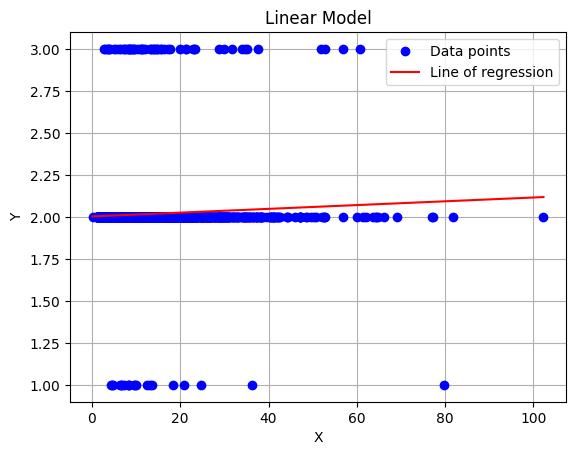

In [3]:
# Hàm hiển thị biểu đồ
def show(xs, ys, theta):
    plt.plot(xs, ys, "o", color="blue") # Vẽ các điểm dữ liệu
    ts = np.linspace(np.min(xs), np.max(xs), 50) # Tạo 50 điểm trong khoảng từ min(xs) đến max(xs)
    yts = theta[0] + theta[1] * ts  # Tính giá trị y tương ứng với các điểm ts
    plt.plot(ts, yts, color="red")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Linear Model")
    plt.legend(["Data points", "Line of regression"])
    plt.grid(True)
    plt.show()

def best_model():
    y = df.iloc[:, 7].to_numpy()
    temp = float('inf') # Khởi tạo giá trị vô cùng lớn

    for i in range(2, 10): ## Chạy từ cột 2 đến 9
        # Bỏ qua cột 7
        if i == 7:
            continue

        x = df.iloc[:, i].to_numpy()
        A, b = getAb(x, y)
        current_norm = norm(A, b, theta(A, b))
        print(f"Norm cho đặc trưng {df.columns[i]}: {current_norm}\n")

        if i == 1 or current_norm < temp:
            temp = current_norm
            col = x
            index = i
    print(f"Đặc trưng được chọn có loss value nhỏ nhất là: {df.columns[index]}")
    print("x:", col)
    print(f"Giá trị norm nhỏ nhất: {temp}")

    show(col, y, theta(A, b))

best_model()

#### Câu c: Xây dựng mô hình của riêng bạn cho kết quả tốt nhất


In [4]:
#Câu c. Xây dựng mô hình của riêng bạn cho kết quả tốt nhất. Chọn mô hình Y = theta1 + theta2 * X^10. Mô hình này cho norm_values nhỏ hơn
#norm_value ở câu a
def getAb_my_model(x, y):
    col1 = np.ones(len(x))
    colx = transpose(np.array(x))
    A = transpose(np.vstack((col1, colx**10)))
    b = np.array(y).reshape(len(y), 1)
    return A, b


def my_model():
    x = df.iloc[:, [2, 3, 4, 5, 6, 8, 9]].to_numpy()

    y = df.iloc[:, 7].to_numpy()

    A, b = getAb_my_model(x, y)
    model_theta = theta(A, b)
    model_norm = norm(A, b, model_theta)
    print("Theta values:\n", model_theta)
    print("Norm value:", model_norm)

my_model()

Theta values:
 [[ 2.0212366 ]
 [ 0.        ]
 [-0.00001211]
 [-0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.        ]
 [-0.        ]]
Norm value: [8.71343214]


#### Mô tả các hàm
- Hàm theta: dùng để tìm nghiệm của phương trình hồi quy
- Hàm norm: tính chuẩn vector phần dư
- Hàm show(xs, ys, theta): vẽ biểu đồ 
- Hàm linear_model(): xây dựng mô hình hồi quy tuyến tính cho 7 biến
- Hàm best_model(): tìm đặc trưng tốt nhất(có norm bé nhất) dựa trên dữ liệu của từng cột với cột DIQ010
- Hàm my_model(): xây dựng mô hình hồi quy tuyến tính tốt cho 7 cột dữ liệu, tốt hơn mô hình ban đầu